In [21]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
import librosa
import librosa.display

In [4]:
def make_sin(duration=1.0,sr=44100,f=440,amp=1):
    X = np.arange(duration*sr)
    wave = amp*np.sin(X*2*np.pi*f/sr)
    return wave
    

In [5]:
a4 = make_sin(f=440)

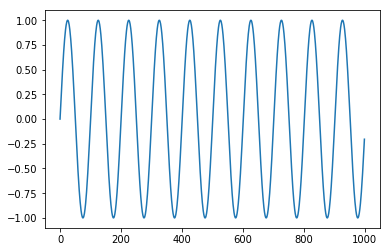

In [6]:
plt.plot(a4[:1000])

In [7]:
IPython.display.Audio(a4,rate=44100)

In [8]:
a3 = make_sin(amp=0.5,f=220)

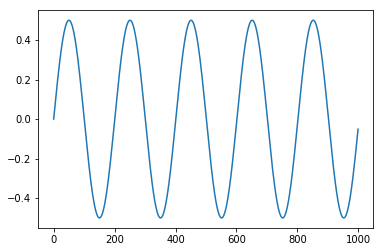

In [11]:
plt.plot(a3[:1000])

In [9]:
IPython.display.Audio(a3,rate=44100)

In [13]:
a34 = (a3 + a4)/2

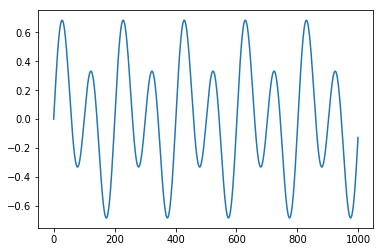

In [15]:
plt.plot(a34[:1000])

In [14]:
IPython.display.Audio(a34,rate=44100)

In [19]:
librosa.core.fft_frequencies(sr=44100,)

array([0.00000000e+00, 2.15332031e+01, 4.30664062e+01, ...,
       2.20069336e+04, 2.20284668e+04, 2.20500000e+04])

In [16]:
spectrogram = librosa.stft(a34)

In [19]:
spectrogram.shape

(1025, 87)

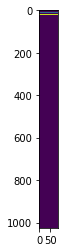

In [20]:
plt.imshow(abs(spectrogram))

In [29]:
a[:,:,9:11]

array([[[ 9],
        [19],
        [29]]])

In [32]:
a = np.arange(1*128*20).reshape(1,20,128)

In [37]:
a.reshape(128,-1,1).shape

(128, 20, 1)

In [24]:
librosa.display.specshow(abs(spectrogram),y_axis=librosa.core.fft_frequencies(sr=44100,))

TypeError: unhashable type: 'numpy.ndarray'

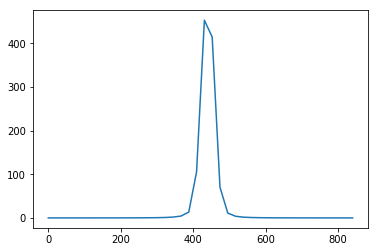

In [49]:
data = a4[:2048] * np.hanning(2048)
a4_spec = librosa.audio.fft.fft(data,2048)
plt.plot(np.fft.fftfreq(2048,1/44100)[:40],abs(a4_spec)[:40])

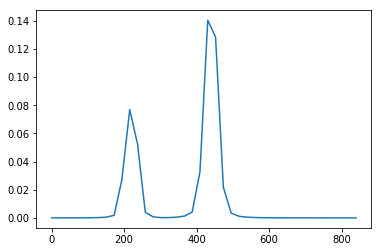

In [71]:
data = a34[:2048] * np.hanning(2048)
a34_spec = librosa.audio.fft.fft(data,2048)
a34_spec = abs(a34_spec) / np.sum(abs(a34_spec))
freq = np.fft.fftfreq(2048,1/44100)

plt.plot(freq[:40],a34_spec[:40])

In [32]:
a4_spec

array([ 2.26398208e+06+0.00000000e+00j, -9.64923984e+05-1.48017601e+03j,
        3.14434016e+02+9.64674504e-01j, ...,
        1.17887821e+02-5.42516788e-01j,  3.14434016e+02-9.64674504e-01j,
       -9.64923984e+05+1.48017601e+03j])

In [40]:
np.fft.fftfreq(2048)

array([ 0.        ,  0.00048828,  0.00097656, ..., -0.00146484,
       -0.00097656, -0.00048828])

In [55]:
np.sum(abs(a34_spec))

1613.8946011790797

In [52]:
a4

array([ 0.        ,  0.06264832,  0.12505052, ..., -0.18696144,
       -0.12505052, -0.06264832])

In [63]:
data = np.zeros(2048)+1

In [64]:
np.fft.fft(data)

array([2048.+0.j,    0.+0.j,    0.+0.j, ...,    0.+0.j,    0.+0.j,
          0.+0.j])

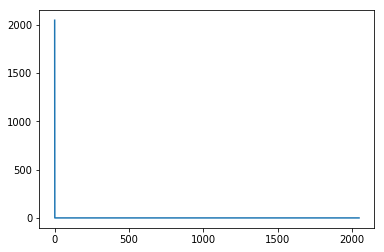

In [65]:
plt.plot(abs(np.fft.fft(data)))